In [1]:
import re
import pandas as pd
import numpy as np
import os
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
import statsmodels.api as sm

In [2]:
def score_cal(orig, pred):
    sums = 0
    
    for ind in range(len(orig)):
        sums += (orig[ind] - pred[ind]) ** 2
    
    print('Result: ')
    print('The Total Sum of Squares / num of data is :' + str(sums/(len(orig))))
    print('')

In [3]:
csv = pd.read_table('FIFIndex_BPL_players.csv', sep=',', index_col = 0)
csv.head(10)

,Name,UpdateDate,Country,OverallScore,PotentialScore,Height,Weight,PreferredFoot,BirthDate,Age,...,LongShots,Curve,FKAcc,Penalties,Volleys,GKPositioning,GKDiving,GKHandling,GKKicking,GKReflexes
0,Mesut Özil,Dec_12_2016,Germany,89,89,183 cm,76 kg,Left,10/15/1988,28,...,76,84,79,67,77,6,6,14,10,14
1,Harry Kane,Dec_12_2016,England,84,90,188 cm,86 kg,Right,07/28/1993,23,...,78,71,66,82,70,14,8,10,11,11
2,Coutinho,Dec_12_2016,Brazil,85,90,171 cm,68 kg,Right,06/12/1992,24,...,85,84,79,64,75,14,12,7,9,6
3,Sergio Agüero,Dec_12_2016,Argentina,89,89,172 cm,74 kg,Right,06/02/1988,28,...,84,82,72,80,85,11,13,15,6,14
4,Nemanja Matić,Dec_12_2016,Serbia,84,84,194 cm,84 kg,Left,08/01/1988,28,...,75,68,67,69,74,14,7,15,12,9
5,Vincent Kompany,Dec_12_2016,Belgium,85,85,192 cm,85 kg,Right,04/10/1986,30,...,55,61,52,63,46,8,10,9,5,6
6,Cesc Fàbregas,Dec_12_2016,Spain,86,86,175 cm,74 kg,Right,05/04/1987,29,...,75,77,81,80,81,15,6,10,8,15
7,Riyad Mahrez,Dec_12_2016,Algeria,84,87,179 cm,62 kg,Left,02/21/1991,25,...,74,78,72,72,71,11,15,9,13,6
8,Granit Xhaka,Dec_12_2016,Switzerland,84,87,185 cm,82 kg,Left,09/27/1992,24,...,85,68,70,59,50,7,7,8,11,13
9,Claudio Bravo,Dec_12_2016,Chile,85,85,184 cm,80 kg,Right,04/13/1983,33,...,21,25,60,23,11,78,83,85,87,85


In [4]:
#Only contains numeric data and remove the dependent variable: OverallScore and PotentionalScore
data = csv._get_numeric_data()
data = data.drop(['OverallScore', 'PotentialScore', 'Contract'], axis=1)
data.head(10)

,Age,BallControl,Dribbling,Marking,SlideTackle,StandTackle,Aggression,Reactions,AttPosition,Interceptions,...,LongShots,Curve,FKAcc,Penalties,Volleys,GKPositioning,GKDiving,GKHandling,GKKicking,GKReflexes
0,28,90,86,22,19,16,54,87,84,24,...,76,84,79,67,77,6,6,14,10,14
1,23,82,77,41,38,36,74,84,85,35,...,78,71,66,82,70,14,8,10,11,11
2,24,88,88,24,40,44,55,80,83,30,...,85,84,79,64,75,14,12,7,9,6
3,28,89,89,13,12,20,57,88,91,24,...,84,82,72,80,85,11,13,15,6,14
4,28,79,72,76,78,84,83,82,68,86,...,75,68,67,69,74,14,7,15,12,9
5,30,66,63,85,86,88,81,83,41,77,...,55,61,52,63,46,8,10,9,5,6
6,29,86,80,60,62,63,45,81,78,50,...,75,77,81,80,81,15,6,10,8,15
7,25,89,89,25,21,27,40,75,81,38,...,74,78,72,72,71,11,15,9,13,6
8,24,80,70,71,69,75,89,86,78,76,...,85,68,70,59,50,7,7,8,11,13
9,33,15,13,11,19,18,40,80,15,23,...,21,25,60,23,11,78,83,85,87,85


In [6]:
#Seperate the dataset into training dataset and testing dataset
num_test = 3000
label = csv.OverallScore.tolist()

dataTrain = data.head(data.shape[0] - num_test)
labelTrain = label[0:(data.shape[0] - num_test)]

dataTest = data.tail(num_test)
labelTest = label[-num_test:]

# Part 1 Use multiple linear regression

In [7]:
#Start with linear regression first
model = sm.OLS(labelTrain, dataTrain)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.999
Model:                            OLS   Adj. R-squared:                  0.999
Method:                 Least Squares   F-statistic:                 6.871e+05
Date:                Thu, 04 May 2017   Prob (F-statistic):               0.00
Time:                        22:32:52   Log-Likelihood:                -76388.
No. Observations:               31922   AIC:                         1.528e+05
Df Residuals:                   31887   BIC:                         1.531e+05
Df Model:                          35                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Age               0.1856      0.005     36.267

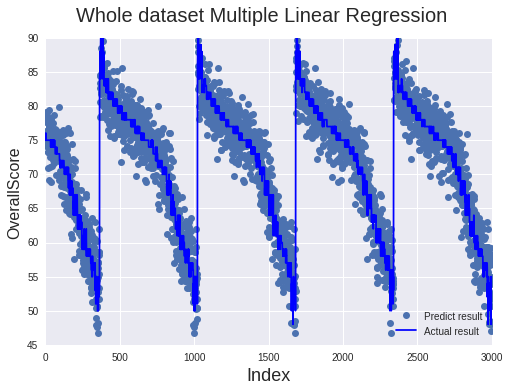

In [11]:
predictions = results.predict(dataTest)

import matplotlib.pyplot as plt
x1 = range(len(labelTest))
fig, ax = plt.subplots()
ax.plot(x1, predictions, 'o', label="Predict result")
ax.plot(x1, labelTest, 'b-', label="Actual result")
ax.legend(loc="best");
fig.suptitle('Whole dataset Multiple Linear Regression', fontsize=20)
plt.xlabel('Index', fontsize=18)
plt.ylabel('OverallScore', fontsize=16)
fig

In [12]:
#Calculate the Total Sum of Squares error
score_cal(labelTest, predictions.tolist())

Result: 
The Total Sum of Squares / num of data is :7.097178447572227



# Part 2: Use the Random Forest

In [13]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(n_estimators=10)
clf = clf.fit(dataTrain, labelTrain)

In [14]:
predictions = clf.predict(dataTest)

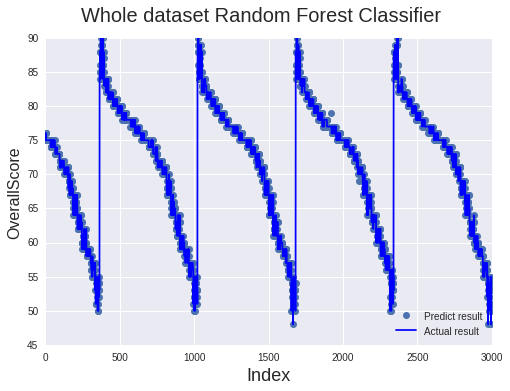

In [15]:
import matplotlib.pyplot as plt
x1 = range(len(labelTest))
fig, ax = plt.subplots()
ax.plot(x1, predictions, 'o', label="Predict result")
ax.plot(x1, labelTest, 'b-', label="Actual result")
ax.legend(loc="best");
fig.suptitle('Whole dataset Random Forest Classifier', fontsize=20)
plt.xlabel('Index', fontsize=18)
plt.ylabel('OverallScore', fontsize=16)
fig

In [16]:
#Calculate the Total Sum of Squares error
score_cal(labelTest, predictions.tolist())

Result: 
The Total Sum of Squares / num of data is :0.0036666666666666666



# Part 3: Use the Gradient Boosting for regression

In [17]:
from sklearn.ensemble import GradientBoostingRegressor

est = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=0, loss='ls').fit(dataTrain, labelTrain)

In [18]:
predictions = est.predict(dataTest)

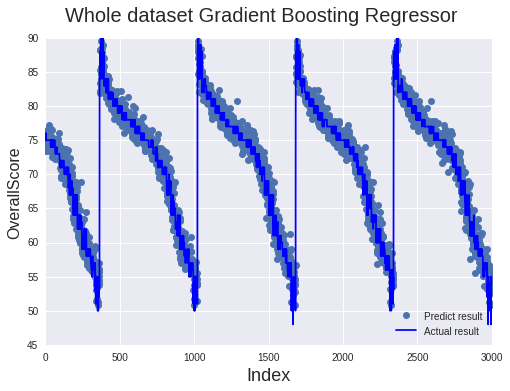

In [19]:
import matplotlib.pyplot as plt
x1 = range(len(labelTest))
fig, ax = plt.subplots()
ax.plot(x1, predictions, 'o', label="Predict result")
ax.plot(x1, labelTest, 'b-', label="Actual result")
ax.legend(loc="best");
fig.suptitle('Whole dataset Gradient Boosting Regressor', fontsize=20)
plt.xlabel('Index', fontsize=18)
plt.ylabel('OverallScore', fontsize=16)
fig

In [20]:
#Calculate the Total Sum of Squares error
score_cal(labelTest, predictions.tolist())

Result: 
The Total Sum of Squares / num of data is :1.4463470106987404



# Part 4: Use multiple linear regression for Goal Keeper (based on different positions)

In [21]:
gkcsv = csv[csv.PreferredPositions == 'GK']
data = gkcsv._get_numeric_data()
data = data.drop(['OverallScore', 'PotentialScore', 'Contract'], axis=1)
print(data.shape)
data.head(10)

(4088, 35)


,Age,BallControl,Dribbling,Marking,SlideTackle,StandTackle,Aggression,Reactions,AttPosition,Interceptions,...,LongShots,Curve,FKAcc,Penalties,Volleys,GKPositioning,GKDiving,GKHandling,GKKicking,GKReflexes
9,33,15,13,11,19,18,40,80,15,23,...,21,25,60,23,11,78,83,85,87,85
14,24,23,13,11,16,18,23,81,13,15,...,17,19,11,27,12,86,84,91,69,89
15,29,34,10,12,18,10,31,84,10,27,...,14,11,10,40,11,82,87,87,68,90
21,34,22,12,11,12,13,17,86,13,23,...,11,13,19,23,17,85,83,90,77,85
22,26,31,13,13,13,21,38,88,12,30,...,12,21,19,40,13,85,88,85,87,90
44,23,23,16,13,13,11,18,83,8,13,...,16,12,14,19,14,80,84,76,80,85
46,29,24,16,13,12,11,42,79,11,21,...,12,17,15,40,12,80,83,81,74,84
54,31,17,15,10,13,15,37,81,11,23,...,11,13,12,11,13,80,86,80,77,85
82,34,27,12,10,10,12,36,75,12,21,...,10,11,12,26,10,84,81,78,75,82
86,23,26,21,16,11,13,32,73,16,27,...,13,12,14,42,12,79,81,83,73,85


In [22]:
#Seperate the dataset into training dataset and testing dataset
num_test = 400
label = gkcsv.OverallScore.tolist()

dataTrain = data.head(data.shape[0] - num_test)
labelTrain = label[0:(data.shape[0] - num_test)]

dataTest = data.tail(num_test)
labelTest = label[-num_test:]

In [23]:
model = sm.OLS(labelTrain, dataTrain)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 4.256e+06
Date:                Thu, 04 May 2017   Prob (F-statistic):               0.00
Time:                        22:36:07   Log-Likelihood:                -1415.3
No. Observations:                3688   AIC:                             2901.
Df Residuals:                    3653   BIC:                             3118.
Df Model:                          35                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Age              -0.0705      0.002    -34.324

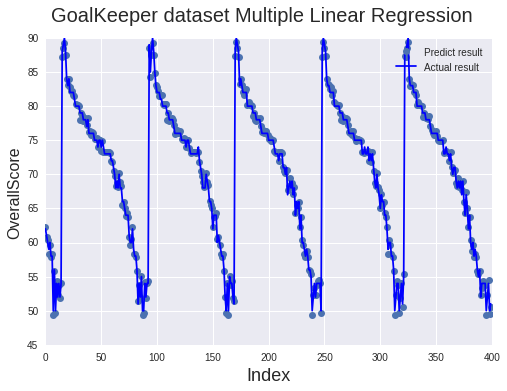

In [24]:
predictions = results.predict(dataTest)

import matplotlib.pyplot as plt
x1 = range(len(labelTest))
fig, ax = plt.subplots()
ax.plot(x1, predictions, 'o', label="Predict result")
ax.plot(x1, labelTest, 'b-', label="Actual result")
ax.legend(loc="best");
fig.suptitle('GoalKeeper dataset Multiple Linear Regression', fontsize=20)
plt.xlabel('Index', fontsize=18)
plt.ylabel('OverallScore', fontsize=16)
fig

In [25]:
#Calculate the Total Sum of Squares error
score_cal(labelTest, predictions.tolist())

Result: 
The Total Sum of Squares / num of data is :0.12481280503663403



# Part 5: Use multiple linear regression for Midfield (based on different positions)

In [141]:
midf = ['LW', 'LDM', 'LAM', 'LCM', 'CAM', 'CDM', 'CM', 'RM', 'LW/CAM', 'LM/RM', 'CAM/CM', 'CDM/CM', 'LM/CM', 'LM/ST/RM', 'CB/CDM/CM', 'CDM/RM/CM', 'LM/ST/RM', 'LM/CAM/RM', 'LW/LM/CAM', 'LW/LM/RW', 'CDM/CAM/CM', 'LM/CDM/CAM', 'LM/CDM/CAM/CM', 'LM/CDM/RM/CM', 'LM/CAM/RM/CM', 'LM/RW/CAM/RM']
midfcsv = csv[csv.PreferredPositions.isin(midf)]
data = midfcsv._get_numeric_data()
data = data.drop(['OverallScore', 'PotentialScore', 'Contract'], axis=1)
print(data.shape)
data.head(10)

(9589, 35)


,Age,BallControl,Dribbling,Marking,SlideTackle,StandTackle,Aggression,Reactions,AttPosition,Interceptions,...,LongShots,Curve,FKAcc,Penalties,Volleys,GKPositioning,GKDiving,GKHandling,GKKicking,GKReflexes
0,28,90,86,22,19,16,54,87,84,24,...,76,84,79,67,77,6,6,14,10,14
2,24,88,88,24,40,44,55,80,83,30,...,85,84,79,64,75,14,12,7,9,6
4,28,79,72,76,78,84,83,82,68,86,...,75,68,67,69,74,14,7,15,12,9
6,29,86,80,60,62,63,45,81,78,50,...,75,77,81,80,81,15,6,10,8,15
8,24,80,70,71,69,75,89,86,78,76,...,85,68,70,59,50,7,7,8,11,13
10,27,89,86,49,55,53,69,83,83,68,...,75,83,64,72,81,5,5,11,14,7
13,23,90,89,68,78,74,72,86,84,70,...,90,82,82,76,84,4,5,6,2,3
20,27,86,89,30,35,39,80,84,85,42,...,80,78,78,77,78,12,10,10,15,13
23,26,88,87,57,64,64,68,87,77,79,...,74,81,74,76,75,5,11,14,5,13
24,31,87,86,58,52,64,64,85,82,64,...,82,86,78,80,72,7,6,9,5,15


In [142]:
#Seperate the dataset into training dataset and testing dataset
num_test = 900
label = midfcsv.OverallScore.tolist()

dataTrain = data.head(data.shape[0] - num_test)
labelTrain = label[0:(data.shape[0] - num_test)]

dataTest = data.tail(num_test)
labelTest = label[-num_test:]

In [143]:
model = sm.OLS(labelTrain, dataTrain)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.999
Model:                            OLS   Adj. R-squared:                  0.999
Method:                 Least Squares   F-statistic:                 4.701e+05
Date:                Thu, 04 May 2017   Prob (F-statistic):               0.00
Time:                        00:33:43   Log-Likelihood:                -16870.
No. Observations:                8689   AIC:                         3.381e+04
Df Residuals:                    8654   BIC:                         3.406e+04
Df Model:                          35                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Age               0.1400      0.008     18.353

/usr/local/lib/python3.5/dist-packages/matplotlib/pyplot.py:524: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


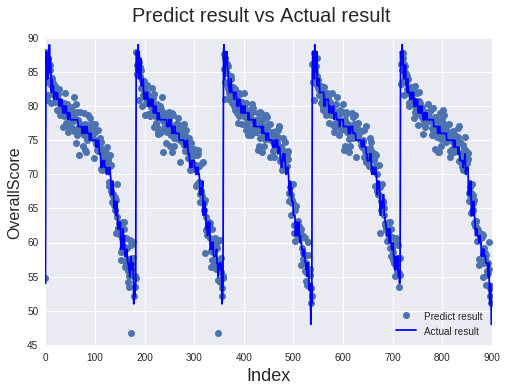

In [144]:
predictions = results.predict(dataTest)

import matplotlib.pyplot as plt
x1 = range(len(labelTest))
fig, ax = plt.subplots()
ax.plot(x1, predictions, 'o', label="Predict result")
ax.plot(x1, labelTest, 'b-', label="Actual result")
ax.legend(loc="best");
fig.suptitle('Predict result vs Actual result', fontsize=20)
plt.xlabel('Index', fontsize=18)
plt.ylabel('OverallScore', fontsize=16)
fig

In [145]:
#Calculate the Total Sum of Squares error
score_cal(labelTest, predictions.tolist())

Result: 
The Total Sum of Squares / num of data is :2.784855150880587



# Part 5: Use multiple linear regression for Attacker (based on different positions)

In [5]:
offend = ['ST', 'LS', 'RS', 'LW', 'RW', 'LM/ST', 'RW/RM', ]
offendcsv = csv[csv.PreferredPositions.isin(offend)]
data = offendcsv._get_numeric_data()
data = data.drop(['OverallScore', 'PotentialScore', 'Contract'], axis=1)
print(data.shape)
data.head(10)

(4538, 35)


,Age,BallControl,Dribbling,Marking,SlideTackle,StandTackle,Aggression,Reactions,AttPosition,Interceptions,...,LongShots,Curve,FKAcc,Penalties,Volleys,GKPositioning,GKDiving,GKHandling,GKKicking,GKReflexes
1,23,82,77,41,38,36,74,84,85,35,...,78,71,66,82,70,14,8,10,11,11
3,28,89,89,13,12,20,57,88,91,24,...,84,82,72,80,85,11,13,15,6,14
16,28,82,79,28,34,39,93,85,88,40,...,70,58,59,76,82,8,11,13,12,11
17,23,78,76,27,30,30,72,77,84,27,...,76,64,66,80,73,7,8,15,14,10
25,35,90,87,15,27,41,84,85,86,20,...,88,80,80,91,93,9,13,15,10,12
31,28,76,74,34,24,48,88,84,87,54,...,73,73,47,72,79,15,10,9,6,11
39,30,83,85,30,25,39,73,84,82,58,...,81,83,80,74,65,8,10,15,12,8
43,21,84,89,35,38,39,62,81,80,42,...,71,75,54,71,74,15,9,8,8,11
50,30,82,72,26,20,37,76,83,84,41,...,76,70,65,81,81,6,12,15,11,5
62,22,84,86,48,54,58,34,79,81,26,...,70,64,49,63,59,15,15,12,12,9


In [7]:
#Seperate the dataset into training dataset and testing dataset
num_test = 400
label = offendcsv.OverallScore.tolist()

dataTrain = data.head(data.shape[0] - num_test)
labelTrain = label[0:(data.shape[0] - num_test)]

dataTest = data.tail(num_test)
labelTest = label[-num_test:]

In [10]:
model = sm.OLS(labelTrain, dataTrain)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 1.338e+06
Date:                Thu, 04 May 2017   Prob (F-statistic):               0.00
Time:                        10:11:08   Log-Likelihood:                -4268.4
No. Observations:                4138   AIC:                             8607.
Df Residuals:                    4103   BIC:                             8828.
Df Model:                          35                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Age               0.0680      0.005     14.467

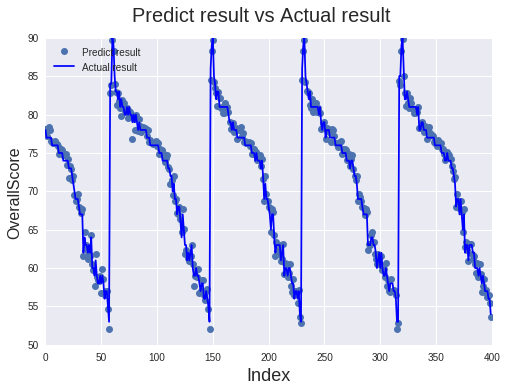

In [11]:
predictions = results.predict(dataTest)

x1 = range(len(labelTest))
fig, ax = plt.subplots()
ax.plot(x1, predictions, 'o', label="Predict result")
ax.plot(x1, labelTest, 'b-', label="Actual result")
ax.legend(loc="best");
fig.suptitle('Predict result vs Actual result', fontsize=20)
plt.xlabel('Index', fontsize=18)
plt.ylabel('OverallScore', fontsize=16)
fig

In [12]:
#Calculate the Total Sum of Squares error
score_cal(labelTest, predictions.tolist())

Result: 
The Total Sum of Squares / num of data is :0.4099288440555445



# Part 6: Use multiple linear regression for defender (based on different positions)

In [51]:
defend = ['CB', 'RB', 'LCB', 'RB', 'LB', 'LB/CB', 'CB/RB', 'LB/RB', 'RB/RM', 'CB/CDM', 'LB/CB/RB', 'LB/CB/CDM', 'CB/RB/CDM', 'RW/RB/RWB', 'LW/LB/LWB', 'RW/RB/RM/RWB', 'RW/CB/RB/RWB']
defendcsv = csv[csv.PreferredPositions.isin(defend)]
data = defendcsv._get_numeric_data()
data = data.drop(['OverallScore', 'PotentialScore', 'Contract'], axis=1)
print(data.shape)
data.head(10)

(11328, 35)


,Age,BallControl,Dribbling,Marking,SlideTackle,StandTackle,Aggression,Reactions,AttPosition,Interceptions,...,LongShots,Curve,FKAcc,Penalties,Volleys,GKPositioning,GKDiving,GKHandling,GKKicking,GKReflexes
5,30,66,63,85,86,88,81,83,41,77,...,55,61,52,63,46,8,10,9,5,6
18,27,70,61,86,83,88,79,84,56,86,...,66,63,69,60,38,16,16,6,14,14
19,31,67,62,83,85,87,90,78,31,85,...,47,22,49,51,35,11,13,11,9,7
26,28,60,41,83,85,85,89,78,49,84,...,56,50,39,44,56,11,12,5,8,12
30,29,74,66,81,81,85,83,81,63,83,...,68,58,73,68,52,12,6,10,9,7
34,32,64,59,84,84,85,84,85,40,85,...,29,33,32,43,34,10,7,11,16,6
37,25,71,68,85,78,84,81,81,51,84,...,48,63,22,42,50,7,11,15,10,10
38,22,63,52,82,86,85,86,74,36,85,...,48,42,43,46,36,9,14,14,10,8
41,32,69,57,81,80,85,83,81,28,83,...,40,34,23,45,34,7,7,10,16,10
45,32,65,39,88,84,88,69,84,43,88,...,25,39,45,42,30,12,12,13,5,8


In [53]:
#Seperate the dataset into training dataset and testing dataset
num_test = 1000
label = defendcsv.OverallScore.tolist()

dataTrain = data.head(data.shape[0] - num_test)
labelTrain = label[0:(data.shape[0] - num_test)]

dataTest = data.tail(num_test)
labelTest = label[-num_test:]

In [54]:
model = sm.OLS(labelTrain, dataTrain)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 1.080e+06
Date:                Thu, 04 May 2017   Prob (F-statistic):               0.00
Time:                        11:01:36   Log-Likelihood:                -16462.
No. Observations:               10328   AIC:                         3.299e+04
Df Residuals:                   10293   BIC:                         3.325e+04
Df Model:                          35                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Age               0.0926      0.005     19.253

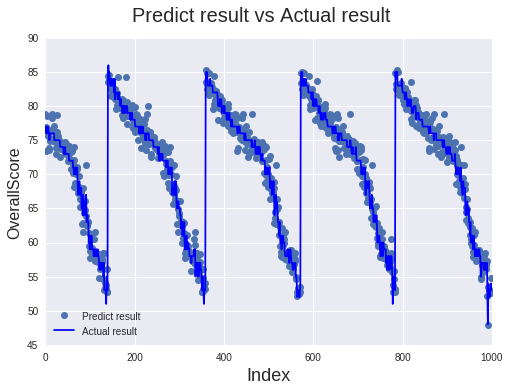

In [55]:
predictions = results.predict(dataTest)

x1 = range(len(labelTest))
fig, ax = plt.subplots()
ax.plot(x1, predictions, 'o', label="Predict result")
ax.plot(x1, labelTest, 'b-', label="Actual result")
ax.legend(loc="best");
fig.suptitle('Predict result vs Actual result', fontsize=20)
plt.xlabel('Index', fontsize=18)
plt.ylabel('OverallScore', fontsize=16)
fig

In [56]:
#Calculate the Total Sum of Squares error
score_cal(labelTest, predictions.tolist())

Result: 
The Total Sum of Squares / num of data is :1.3688708717842921



In [57]:
CIs = results.conf_int()
#notSignificant = (CIs[:,0] < 0) & (CIs[:,1] > 0)
#notSignificant
CIs1 = CIs[CIs[0] < 0]
CIs2 = CIs1[CIs1[1] > 0]
affect = CIs2.index.tolist()
affect

['Composure', 'LongPass', 'Acceleration', 'Jumping', 'GKHandling']

In [58]:
dataTrain = dataTrain[affect]

In [60]:
model = sm.OLS(labelTrain, dataTrain)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.995
Model:                            OLS   Adj. R-squared:                  0.995
Method:                 Least Squares   F-statistic:                 4.436e+05
Date:                Thu, 04 May 2017   Prob (F-statistic):               0.00
Time:                        11:02:03   Log-Likelihood:                -31098.
No. Observations:               10328   AIC:                         6.221e+04
Df Residuals:                   10323   BIC:                         6.224e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Composure        0.3870      0.006     66.784   

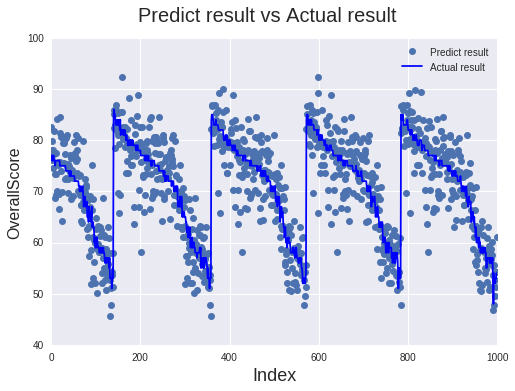

In [61]:
predictions = results.predict(dataTest[affect])

x1 = range(len(labelTest))
fig, ax = plt.subplots()
ax.plot(x1, predictions, 'o', label="Predict result")
ax.plot(x1, labelTest, 'b-', label="Actual result")
ax.legend(loc="best");
fig.suptitle('Predict result vs Actual result', fontsize=20)
plt.xlabel('Index', fontsize=18)
plt.ylabel('OverallScore', fontsize=16)
fig

In [62]:
#Calculate the Total Sum of Squares error
score_cal(labelTest, predictions.tolist())

Result: 
The Total Sum of Squares / num of data is :22.909917844857485

